# PageRank

PageRank (PR) is an algorithm used by Google Search to rank web pages in their search engine results. PageRank is a way of measuring the importance of website pages.

The PageRank algorithm outputs a probability distribution used to represent the likelihood that a person randomly clicking on links will arrive at any particular page.
<img src="pagerank.png" width="500" align="center">

## Simplified algorithm
Assume a small universe of four web pages: A, B, C, and D. Links from a page to itself are ignored. Multiple outbound links from one page to another page are treated as a single link. PageRank is initialized to the same value for all pages.

The PageRank value for any page u can be expressed as:
### $PR(u)=\Sigma_{v \in B_u}\,\frac{PR(v)}{L(v)}$
The PageRank value for a page $u$ is dependent on the PageRank values for each page $v$ contained in the set $B_u$ (the set containing all pages linking to page $u$), divided by the number $L(v)$ of links from page $v$.



In this project you will compute PageRank algorithm using 3 ways:
1. Networkx module
2. Power Method
3. Random walk

Then will evaluate your algorithm using a simple example.

In [2]:
from graphs import getGraph , plotGraph
import networkx as nx
import math
import numpy as np
import random

# Load the data

In [3]:
edge_file = "data/test"
number_of_nodes_in_web_graph = 9
beta = 0.85
epsilon=1e-5
max_iterations=100

# Set up graph

In [4]:
g = getGraph(edge_file)
edges = g.get_connections()
print (edges)

defaultdict(<class 'list'>, {0: [2, 3, 4, 5, 6, 8], 1: [2, 3, 4, 5, 7], 2: [3, 7, 8], 3: [0, 2, 5, 7, 8], 4: [8], 5: [0, 3], 6: [0, 1, 3, 7], 7: [2, 6, 8], 8: [2, 7]})


In [5]:
G = nx.DiGraph() 
G.add_nodes_from(range(number_of_nodes_in_web_graph))
for edge in edges:
    for i in edges[edge]:
        G.add_edge(edge, i)

# 1. PageRank with Networkx
Compute PageRank using [pagerank](https://networkx.org/documentation/stable/reference/algorithms/generated/networkx.algorithms.link_analysis.pagerank_alg.pagerank.html#networkx.algorithms.link_analysis.pagerank_alg.pagerank) in Networkx using graph `G`

In [19]:
# Your code here
G_dictionary = nx.pagerank(G, alpha=beta, max_iter=max_iterations, tol=epsilon)
# print(G_dictionary)

final_test = list(G_dictionary.items())
#final_test.sort(key=lambda tup: tup[1], reverse=True) 
final_rank_vector = []  # List of final rank of vertices

# Appending final ranks to list:
for i in final_test:
    final_rank_vector.append(i[1]*5000)

## Plot the output graph
Use `plotGraph` giving input `edges`.

`plot` function with inputs: number_of_nodes, final_rank_vector

if the size of nodes are small, multiply final rank into a big number (e.g., 5000)

[7, 2, 8, 3, 6, 0, 5, 1, 4]


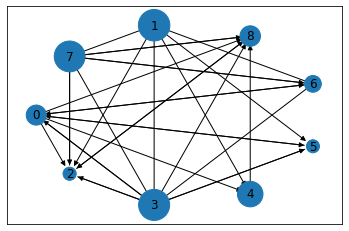

In [36]:
# Your code here:
graph = plotGraph(edges, interval=3000)
graph.plot(9, final_rank_vector)

# Page and Brin Algorithm (Original PageRank)

The Simplified model has some issues. (for more information check [this](http://pi.math.cornell.edu/~mec/Winter2009/RalucaRemus/Lecture3/lecture3.html) link).

In order to overcome these problems, fix a positive constant $p$ between 0 and 1, which we call the **damping factor** (a typical value for p is 0.15). Define the **Page Rank matrix** (also known as the **Google matrix**) of the graph by:

$M = (1-p) \cdot A + p\cdot B \quad$ where $\quad B=\frac{1}{n} \cdot \begin{bmatrix} 1 & \dots & 1 \\
    \vdots & \ddots & \\ 1 & & 1 \end{bmatrix}$

and $A$ is the transition matrix.

Now in `get_google_matrix` Convert Edges to google matrix: check [here](http://pi.math.cornell.edu/~mec/Winter2009/RalucaRemus/Lecture3/lecture3.html) for help)

You can use [`nx.to_numpy_array`](https://networkx.org/documentation/stable/reference/generated/networkx.convert_matrix.to_numpy_array.html) for converting edges to numpy array.

In [78]:
def get_google_matrix(G, p=0.15):
    # Your code here
    n = G.number_of_nodes()
    A = nx.to_numpy_array(G).T
    # for sink nodes
    is_sink = np.sum(A, axis=0)==0
    B = (np.ones_like(A) - np.identity(n)) / (n-1)
    A[:, is_sink] += B[:, is_sink]
    
    D_inv = np.diag(1/np.sum(A, axis=0))
    M = np.dot(A, D_inv) 
    
    # for disconnected components
    M = (1-p)*M + p*np.ones((n,n))/n
    return M

In [18]:
# get_google_matrix(G)

# 2. PageRank using Eigendecomposition

In this part we compute PageRank using eigendecomposition of the Google matrix. The L1-normalized eigenvector corresponding to the largest eigenvalue (=1) is the PageRank vector.

You can use [np.linalg.eig](https://numpy.org/doc/stable/reference/generated/numpy.linalg.eig.html) for computing eigen vectors of the Graph.

First compute L1-norm of the array:

L1 Norm is the sum of the magnitudes of the vectors in a space.

In [80]:
def l1_norm(x):
    # Your code here
    return np.sum(np.abs(x))
    
    # raise NotImplementedError

In [81]:
def pagerank_edc(G, p=0.15):
    # Your code here
    # compute the eigen vector corresponding to the largest eigenvalue of the google matrix (using np.linalg)
    M = get_google_matrix(G, p=p)
    eigenvalues, eigenvectors = np.linalg.eig(M)
    
    idx = eigenvalues.argsort()[-1]
    # flatten the vector
    eigen_vector_flat = np.array(eigenvectors[:,idx]).flatten().real
    #normalize it by l1_norm
    return eigen_vector_flat / l1_norm(eigen_vector_flat)
    # raise NotImplementedError

In [19]:
# pagerank_edc(G, p=0.15)

## Plot the output graph
Use `plotGraph` giving input `edges`.

`plot` function with inputs: number_of_nodes, final_rank_vector * (big number)

[7, 2, 8, 3, 6, 0, 5, 1, 4]


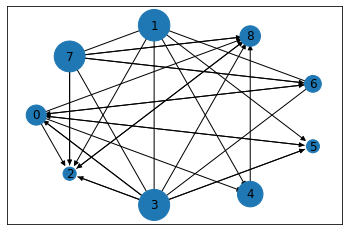

In [83]:
arr = pagerank_edc(G)
arr = np.negative(arr.flatten())
# Your code here

graph = plotGraph(edges, interval=3000)
graph.plot(9, arr*5e3)

# 2. PageRank using Power Method

## Power Method
Power method is an eigenvalue algorithm: given a diagonalizable matrix $A$, the algorithm will produce a number $\lambda$ , which is the greatest (in absolute value) eigenvalue of $A$, and a nonzero vector $v$, which is a corresponding eigenvector of $\lambda$ , that is, $Av=\lambda v$. 

In [111]:
def power_method(M, V, max_iterations, node_num, eps):
    pg = plotGraph(edges, interval=3000)
    for iter in range(max_iterations):
        # Plotting every step
        print("PageRank iteration: " + str(iter))
        pg.plot(9, V*10000)
        
        # Your code here:
        V_last = V
        V = np.dot(M, V)
        if  l1_norm(V-V_last)/node_num < eps:
            return V
        
        # raise NotImplementedError

Implement PageRank using Power method:

In [114]:
def page_rank_pm(beta, G, epsilon, max_iterations, node_num, p=0.15):
    # Your code here
    M = get_google_matrix(G, p=p)
    n = G.number_of_nodes()
    V = np.ones(n)/n
    V_last = V
    V = np.dot(M, V)
    return power_method(M, V, max_iterations, node_num=n, eps=epsilon)

PageRank iteration: 0
[8, 7, 3, 2, 0, 5, 6, 4, 1]


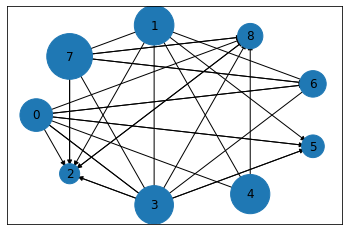

PageRank iteration: 1
[2, 7, 8, 3, 0, 6, 5, 4, 1]


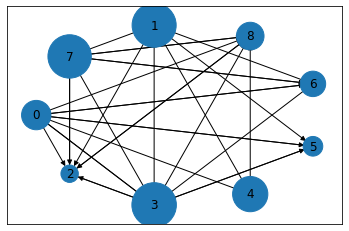

PageRank iteration: 2
[7, 8, 2, 3, 6, 0, 5, 4, 1]


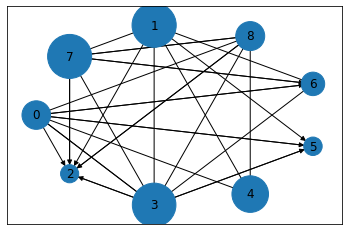

PageRank iteration: 3
[7, 2, 8, 3, 6, 0, 5, 1, 4]


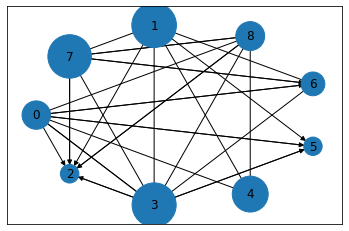

PageRank iteration: 4
[7, 2, 8, 3, 6, 0, 5, 1, 4]


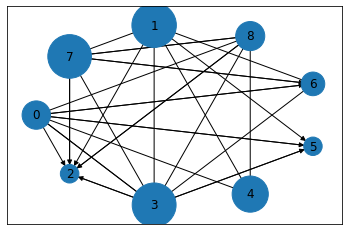

PageRank iteration: 5
[7, 2, 8, 3, 6, 0, 5, 1, 4]


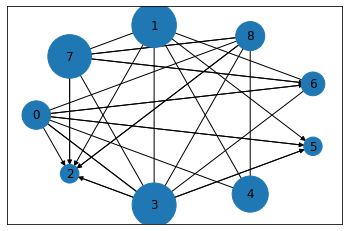

PageRank iteration: 6
[7, 2, 8, 3, 6, 0, 5, 1, 4]


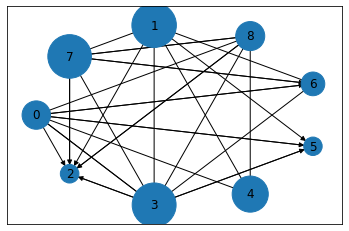

PageRank iteration: 7
[7, 2, 8, 3, 6, 0, 5, 1, 4]


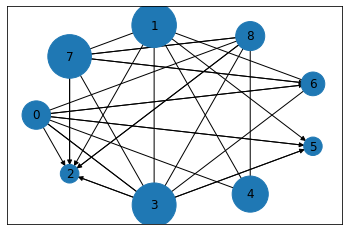

PageRank iteration: 8
[7, 2, 8, 3, 6, 0, 5, 1, 4]


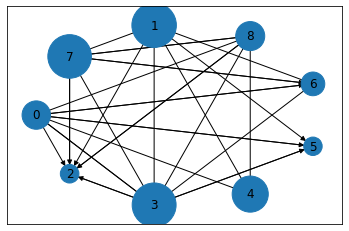

PageRank iteration: 9
[7, 2, 8, 3, 6, 0, 5, 1, 4]


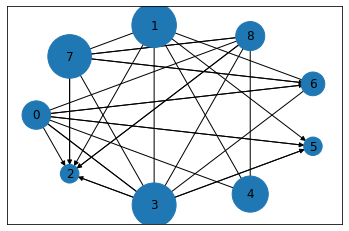

In [115]:
arr = page_rank_pm(beta, G, epsilon, max_iterations=100, node_num=number_of_nodes_in_web_graph)

# 3. PageRank with Random walk 
A random walk is a mathematical object, known as a stochastic or random process, that describes a path that consists of a succession of random steps on some mathematical space such as the integers.

In the random walk method we will choose 1 node from the graph uniformly at random. After choosing the node we will look at its neighbors and choose a neighbor uniformly at random and continue these iterations until convergence is reached. After N iterations a point will come after which there will be no change In points of every node. This situation is called convergence.

In general, we are interested in how a very large number of walkers (a population of walkers) would end up covering the various nodes in the graph.

The particular question we want to answer is to figure out the proportion (percentage) of the population at each node after having the walkers roam the graph for a very long time. Thus, **for a node X, we want to find Pr(X)**.

<img src="https://www.cs.bu.edu/~best/courses/cs109/modules/randomwalks/images/ExampleGraph.gif" width="250" align="center">

For example,consider graph above. It does not matter what initial conditions we have for the population at time zero, at the end the proportions of the populations in A, B, and C will be the same and equal to PageRank vector. Use [this Excel spreadsheet](https://www.cs.bu.edu/~best/courses/cs109/modules/randomwalks/code/PageRank%20Simulator/Examples/RandomWalkSimulationExample.xls) to see the final state is independent to the initial state. (sum of rows should be 100)

$$Pr(A)=0.44$$
$$Pr(B)=0.33$$
$$Pr(C)=0.22$$

You can use `random.choice` for choosing a random node.

In [33]:
def random_walk(g):
    # Your code here
    rwp = [0 for i in range(g.number_of_nodes())]
    nodes = list(g.nodes())
    current_node = random.choice(nodes)
    # Your code here
    neighbors = [[] for i in range(g.number_of_nodes())]
    
    for node in nodes:
        for edge in g.edges:
            if edge[0] == node:
                neighbors[node].append(edge[1])
    
    for z in range (10000):
        rwp[current_node] += 1
        current_node = random.choice(neighbors[current_node])

    return rwp

[7, 2, 8, 3, 6, 0, 5, 1, 4]


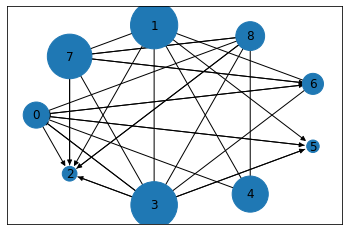

In [35]:
graph = plotGraph(edges, interval=3000)
graph.plot(9, random_walk(G))